In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cov = pd.read_csv('covid19.csv')

In [ ]:
cov.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0


In [ ]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19220 entries, 0 to 19219
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  8432 non-null   object 
 1   Country/Region  19220 non-null  object 
 2   Lat             19220 non-null  float64
 3   Long            19220 non-null  float64
 4   Date            19220 non-null  object 
 5   Confirmed       19219 non-null  float64
 6   Deaths          19219 non-null  float64
 7   Recovered       19219 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.2+ MB


In [ ]:
cov.rename(columns = {'Province/State':'State','Country/Region':'Country'},inplace = True)

In [ ]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19220 entries, 0 to 19219
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      8432 non-null   object 
 1   Country    19220 non-null  object 
 2   Lat        19220 non-null  float64
 3   Long       19220 non-null  float64
 4   Date       19220 non-null  object 
 5   Confirmed  19219 non-null  float64
 6   Deaths     19219 non-null  float64
 7   Recovered  19219 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.2+ MB


In [ ]:
cov['active'] = cov['Confirmed']-cov['Recovered']-cov['Deaths']

In [ ]:
cov.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0,0.0


In [ ]:
cov['Confirmed','Deaths','Active'].groupby(['Country'])

KeyError: ignored

In [ ]:
cov.groupby(['Country']).agg({'Confirmed':'size'
                  ,'Deaths':'size'
                  ,'active':'size'})

,Confirmed,Deaths,active
Country,,,
Afghanistan,62,62,62
Albania,62,62,62
Algeria,62,62,62
Andorra,62,62,62
Angola,62,62,62
...,...,...,...
Uzbekistan,62,62,62
Venezuela,62,62,62
Vietnam,62,62,62


In [ ]:
df1 = cov.groupby(by='Country')[['Confirmed','Deaths','active']].sum()

In [ ]:
import seaborn as sns

In [ ]:
df1

,Confirmed,Deaths,active
Country,,,
Afghanistan,289.0,2.0,279.0
Albania,713.0,19.0,688.0
Algeria,1192.0,94.0,796.0
Andorra,536.0,2.0,523.0
Angola,7.0,0.0,7.0
...,...,...,...
Uzbekistan,217.0,0.0,217.0
Venezuela,392.0,0.0,362.0
Vietnam,1552.0,0.0,967.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  183 non-null    float64
 1   Deaths     183 non-null    float64
 2   active     183 non-null    float64
dtypes: float64(3)
memory usage: 9.8+ KB


TypeError: ignored

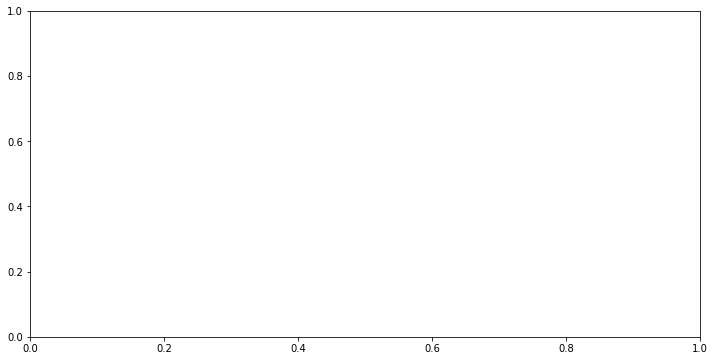

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.barh(cov.Country.unique,cov.groupby(by='Country')['active'].sum())